<a href="https://colab.research.google.com/github/ishankarve/Linear-Regression/blob/main/Multiple%20Linear%20Regression%20in%20Python/Assignment/Bike%20Sharing%20RFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective**
Build a multiple linear regression model for the prediction of demand for shared bikes using `RFE`. 

### **Problem Statement**

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 


### **Business Goal**

Find variables are significant in predicting the demand for shared bikes and how well those variables describe the bike demands
Based on various **meteorological surveys** and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Based on the goal mentioned above, model the demand for shared bikes with the available independent variables.

### **Data Caveats**

1.   In the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as described in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

2.  The column 'yr' has two values 0 and 1 indicating the years 2018 and 2019 respectively. Since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 


### **Model Building**

In the dataset provided,there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. ***The model should be built taking this 'cnt' as the target variable.***

### **Step 1: Import Libraries**


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [7]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### **Step 2: Import Data**

In [8]:
#import data from gihub link
df_bikeshare=pd.read_csv("https://raw.githubusercontent.com/ishankarve/Linear-Regression/main/Multiple%20Linear%20Regression%20in%20Python/Assignment/day.csv")

In [9]:
df_bikeshare.head(730)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


# **Data Dictionary**
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### **Step 3: Undertake sanity checks on data**

In [10]:
#get shape of the dataframe
df_bikeshare.shape

(730, 16)

In [11]:
#check column dtypes
df_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
#get list of unique variables per column
print(df_bikeshare.nunique())

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


In [13]:
# get count of non-na values across all columns
df_bikeshare.apply(lambda x: x.count(), axis=0)

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

In [14]:
# convert 'dteday' from 'object' to 'datetime'
df_bikeshare['dteday'] = pd.to_datetime(df_bikeshare['dteday'], format='%d-%m-%Y') #date is in 01-01-2018 format

In [15]:
#describe dataframe
df_bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### **Step 4: Cleaning & Binning Numerical Categorical Data**

In [16]:
#using 'OR' operation for holiday and working day to make holiday column redundant
df_bikeshare['workingday']=df_bikeshare['workingday'] + df_bikeshare['holiday']
#drop 'holiday' column
df_bikeshare.drop(['holiday'], axis = 1, inplace = True)


In [17]:
# binning windspeed data as per Beaufort Scale (https://www.rmets.org/metmatters/beaufort-scale)
# Note: Since temperature is in metric units (deg Celsius), it is assumed that windspeed is in Km/Hr

#bin_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
bin_labels = ['Calm','Light_air','Light_Breeze','Gentle_Breeze','Moderate_Breeze','Fresh_Breeze','Strong_Breeze','Moderate_Gale','Fresh_Gale','Strong_Gale','Whole_Gale','Storm','Hurricane']

bins = [0, 1, 5, 11, 19, 28, 38, 49, 61, 74, 88, 102, 117,300]
df_bikeshare['windspeed_binned'] = pd.cut(df_bikeshare['windspeed'], bins=bins, labels=bin_labels)

In [18]:
# binning temperature data as per comfort Scale (http://www.city-data.com/forum/weather/1620160-your-personal-temperature-colors-descriptors.html)
# data is binned as follows
# data is binned on a scale of 1 to 12
# 12- 45C & up: extremely hot 
# 11- 40 to 45C: very hot 
# 10- 35 to 40C: hot 
# 09- 30 to 35C: quite warm 
# 08 -20 to 30C: ideal 
# 07- 15 to 20C: lower than ideal 
# 06- 10 to 15C: cool 
# 05- 5 to 10C: quite cool 
# 04- 0 to 5C: cold 
# 03 -5 to 0C: very cold 
# 02- -10 to -5C: freezing 
# 01- -15 to -10C: frigid

#bin_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
bin_labels = ['Frigid','Freezing','Very_Cold','Cold','Quite_Cool','Cool','Lower_Ideal','Ideal','Quite_Warm','Hot','Very_Hot','Extremely_Hot']
bins = [-15,-10,-5,0,5,10,15,20,30,35,40,45,60]
df_bikeshare['temp_binned'] = pd.cut(df_bikeshare['temp'], bins=bins, labels=bin_labels)

In [20]:
#extracting day from date
df_bikeshare["day"]=df_bikeshare.dteday.dt.day

In [21]:
#binning months into quarters (1st,2nd,3rd,4th)
bin_labels = ['First', 'Second', 'Third', 'Fourth']
bins = [0,3,6,8,12]
df_bikeshare['quarter_binned'] = pd.cut(df_bikeshare['mnth'], bins=bins, labels=bin_labels)

In [22]:
#binning weekday  into labelled bins
bin_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
bins = [-1,0,1,2,3,4,5,6]
df_bikeshare['weekday_binned'] = pd.cut(df_bikeshare['weekday'], bins=bins, labels=bin_labels)

In [23]:
#binning humidity  into labelled bins
bin_labels = ['Too_Dry', 'Optimum', 'Too_Humid']
bins = [0, 30, 60, 100]
df_bikeshare['hum_binned'] = pd.cut(df_bikeshare['hum'], bins=bins, labels=bin_labels)

In [24]:
#binning months into labelled months)
bin_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_bikeshare['mnth_binned'] = pd.cut(df_bikeshare['mnth'], bins=bins, labels=bin_labels)

In [25]:
#binning months into labelled months)
bin_labels = ['Clear', 'Cloudy', 'Light_RainSnow', 'Heavy_RainSnow']
bins = [0, 1, 2, 3, 4]
df_bikeshare['weathersit_binned'] = pd.cut(df_bikeshare['weathersit'], bins=bins, labels=bin_labels)

In [26]:
#binning seasons into labelled variables
bin_labels = ['Spring', 'Summer', 'Autumn', 'Winter']
bins = [0, 1, 2, 3, 4]
df_bikeshare['season_binned'] = pd.cut(df_bikeshare['season'], bins=bins, labels=bin_labels)

### **Step 5: Prelimnary Visualisation**
Since all data is numeric, we can use plots to visualise data 

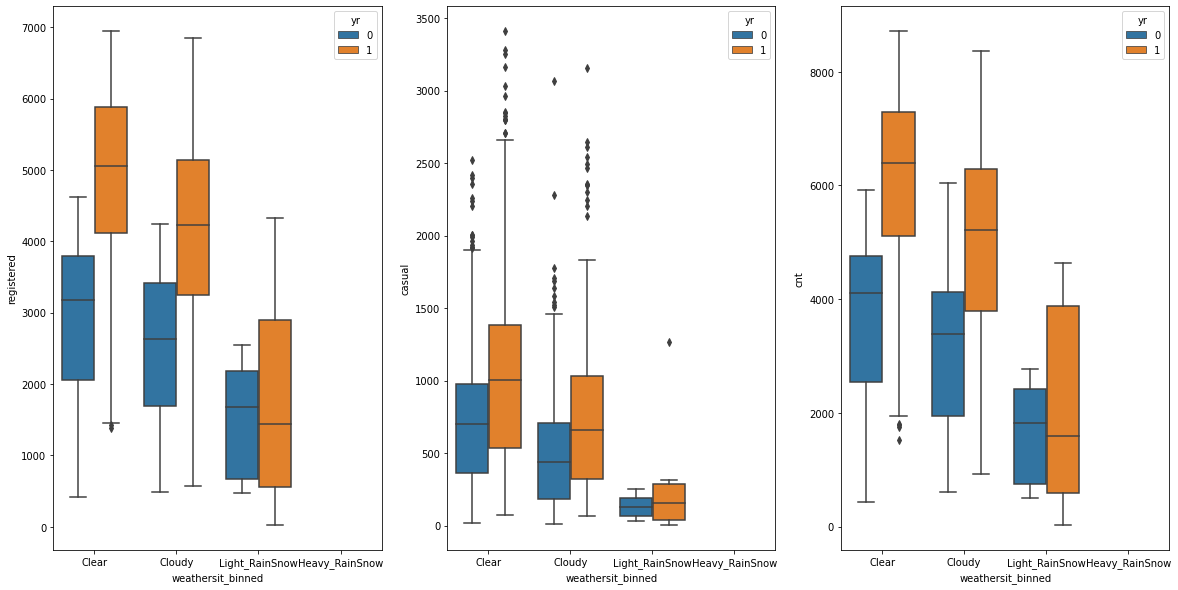

In [27]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weathersit_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'weathersit_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'weathersit_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

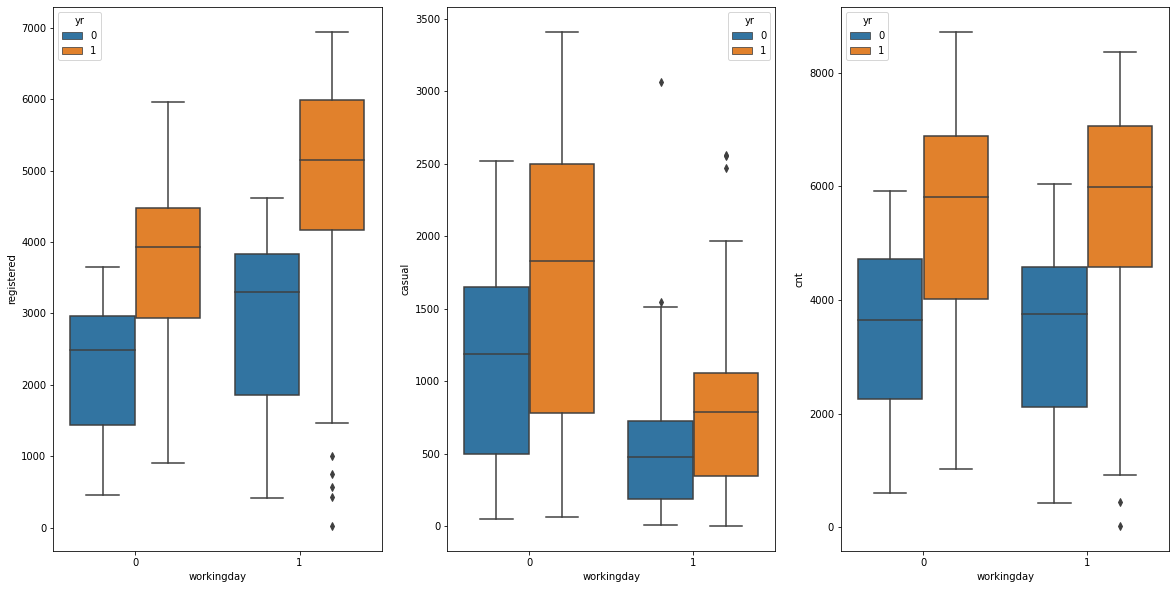

In [28]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'workingday', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'workingday', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

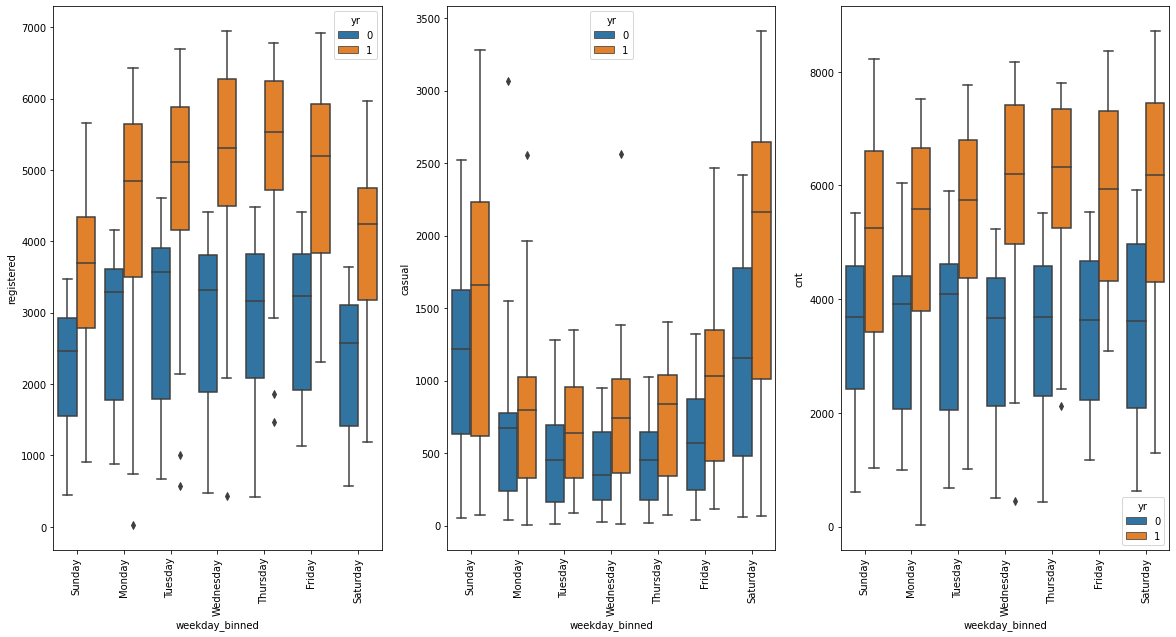

In [29]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weekday_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'weekday_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'weekday_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#plotting data for comparative analysis
#plt.figure(figsize=(20, 10))
#plt.subplot(1,3,1)
#sns.boxplot(x = 'season_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
#plt.subplot(1,3,2)
#sns.boxplot(x = 'season_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
#plt.subplot(1,3,3)
#sns.boxplot(x = 'season_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
#plt.show()

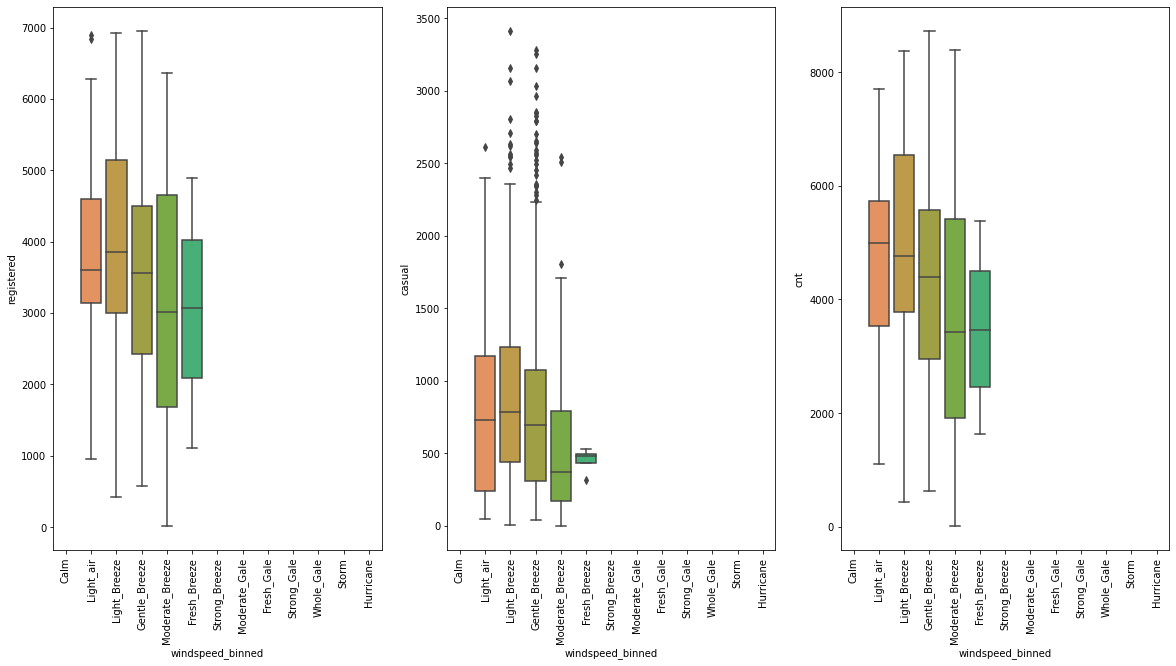

In [30]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'windspeed_binned', y = 'registered', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'windspeed_binned', y = 'casual', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'windspeed_binned', y = 'cnt', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

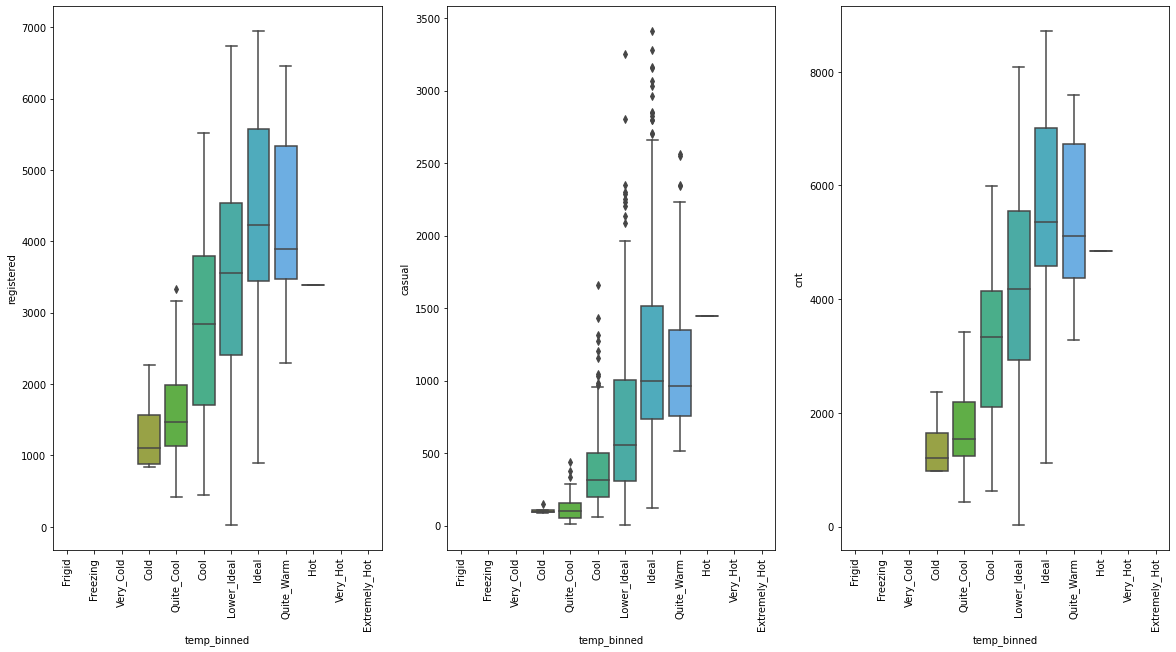

In [31]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'temp_binned', y = 'registered', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'temp_binned', y = 'casual', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'temp_binned', y = 'cnt', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

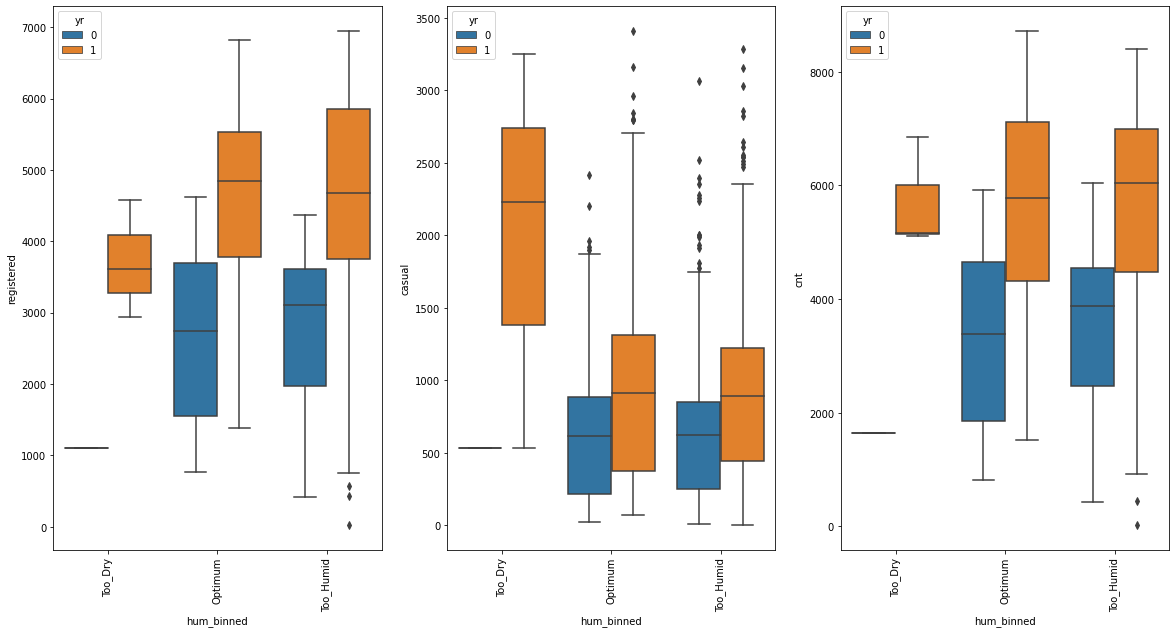

In [32]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'hum_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'hum_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'hum_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

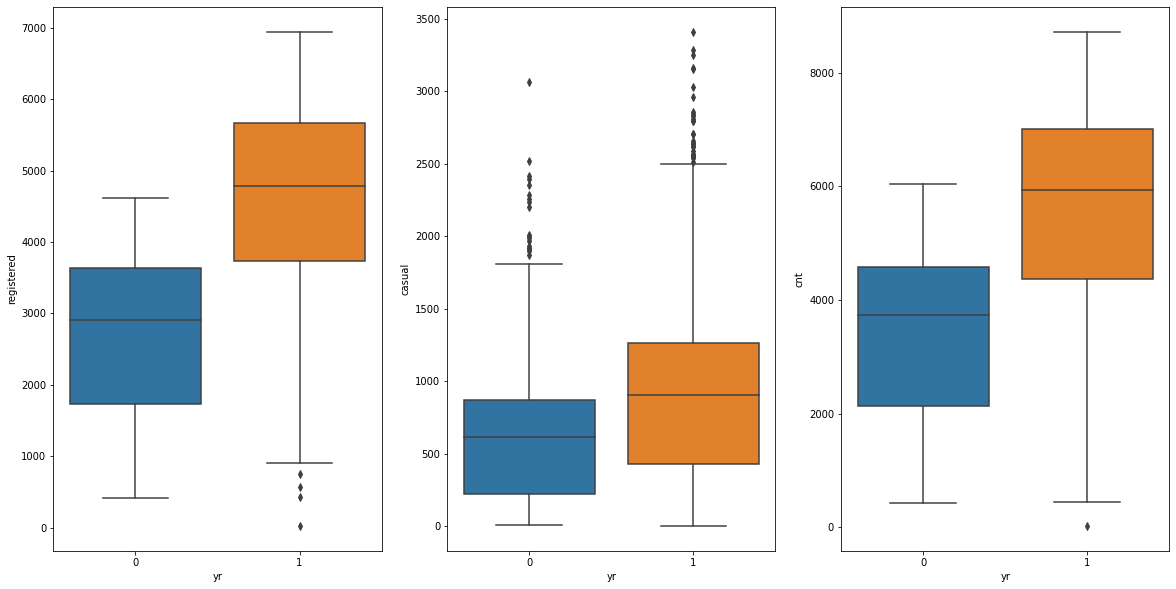

In [33]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'yr', y = 'registered', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'yr', y = 'casual', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikeshare)
plt.show()

In [34]:
#plot chart per day to find specific days where surge can be expected

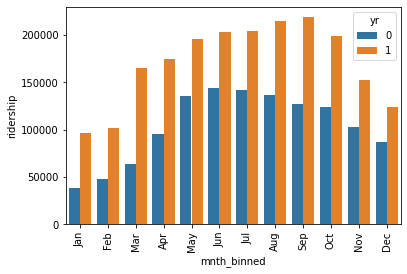

In [35]:
#plot variation across months
# perform groupby
df = df_bikeshare.groupby(['mnth_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="mnth_binned",y="ridership",hue="yr",data=df)
plt.xticks(rotation='vertical')
plt.show()

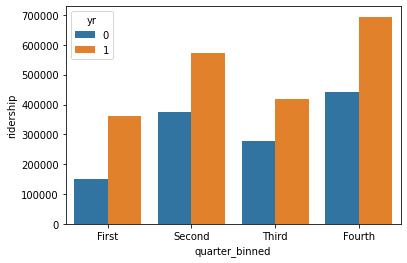

In [36]:
#plot variation across quarters
# perform groupby
df = df_bikeshare.groupby(['quarter_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="quarter_binned",y="ridership",hue='yr',data=df)

plt.show()

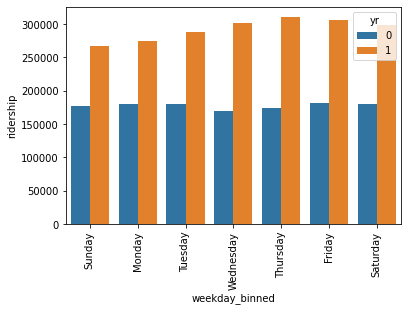

In [37]:
#plot variation across weekdays
# perform groupby
df = df_bikeshare.groupby(['weekday_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="weekday_binned",y="ridership",hue='yr',data=df)
plt.xticks(rotation='vertical')
plt.show()

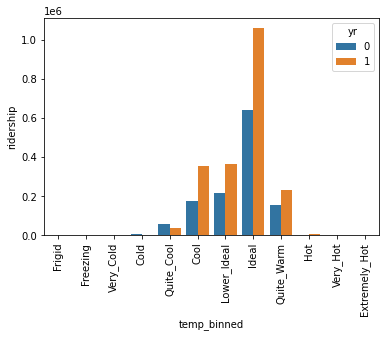

In [38]:
#plot variation across temperature conditions
# perform groupby
df = df_bikeshare.groupby(['temp_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="temp_binned",y="ridership",hue='yr',data=df)
plt.xticks(rotation='vertical')
plt.show()

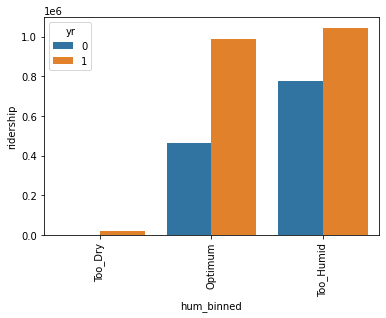

In [39]:
#plot variation across humidity conditions
# perform groupby
df = df_bikeshare.groupby(['hum_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="hum_binned",y="ridership",hue='yr',data=df)
plt.xticks(rotation='vertical')
plt.show()

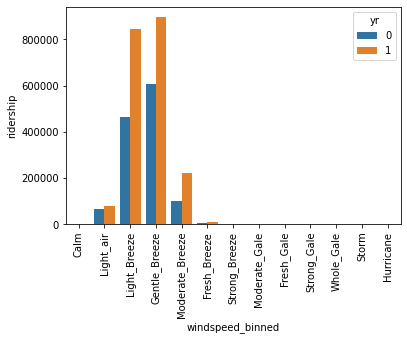

In [40]:
#plot variation across wind conditions
# perform groupby
df = df_bikeshare.groupby(['windspeed_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="windspeed_binned",y="ridership",hue='yr',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
#plot variation across day
# perform groupby
#df = df_bikeshare.groupby(['day','yr']).agg(ridership=("cnt", 'sum'))
#df = df.reset_index()
  
# plot barplot
#sns.barplot(x="day",y="ridership",hue='yr',data=df)

#plt.show()

In [42]:
print(df_bikeshare.nunique())

instant              730
dteday               730
season                 4
yr                     2
mnth                  12
weekday                7
workingday             2
weathersit             3
temp                 498
atemp                689
hum                  594
windspeed            649
casual               605
registered           678
cnt                  695
windspeed_binned       5
temp_binned            7
day                   31
quarter_binned         4
weekday_binned         7
hum_binned             3
mnth_binned           12
weathersit_binned      3
season_binned          4
dtype: int64


In [43]:
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'windspeed_binned', 'temp_binned', 'day',
       'quarter_binned', 'weekday_binned', 'hum_binned', 'mnth_binned',
       'weathersit_binned', 'season_binned'],
      dtype='object')

### **Step 6: Creating Dummy Variables**

In [44]:
#create dummy variables for binned categorial variables
windspeed_dummy = pd.get_dummies(df_bikeshare['windspeed_binned'],drop_first=True)
temp_dummy = pd.get_dummies(df_bikeshare['temp_binned'],drop_first=True)
quarter_dummy = pd.get_dummies(df_bikeshare['quarter_binned'],drop_first=True)
weathersit_dummy = pd.get_dummies(df_bikeshare['weathersit_binned'],drop_first=True)
weekday_dummy = pd.get_dummies(df_bikeshare['weekday_binned'],drop_first=True)
hum_dummy = pd.get_dummies(df_bikeshare['hum_binned'],drop_first=True)
mnth_dummy = pd.get_dummies(df_bikeshare['mnth_binned'],drop_first=True)
season_dummy = pd.get_dummies(df_bikeshare['season_binned'],drop_first=True)





In [45]:
#drop corresponding categorical variables
#Reference: https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
df_bikeshare.drop(list(df_bikeshare.filter(regex = 'binned')), axis = 1, inplace = True)

In [46]:
#check dataframe for columns deletion
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

In [47]:
#check variables
print(windspeed_dummy.nunique())
print(temp_dummy.nunique())
print(quarter_dummy.nunique())
print(weathersit_dummy.nunique())
print(weekday_dummy.nunique())
print(hum_dummy.nunique())
print(mnth_dummy.nunique())
print(season_dummy.nunique())

Light_air          2
Light_Breeze       2
Gentle_Breeze      2
Moderate_Breeze    2
Fresh_Breeze       2
Strong_Breeze      1
Moderate_Gale      1
Fresh_Gale         1
Strong_Gale        1
Whole_Gale         1
Storm              1
Hurricane          1
dtype: int64
Freezing         1
Very_Cold        1
Cold             2
Quite_Cool       2
Cool             2
Lower_Ideal      2
Ideal            2
Quite_Warm       2
Hot              2
Very_Hot         1
Extremely_Hot    1
dtype: int64
Second    2
Third     2
Fourth    2
dtype: int64
Cloudy            2
Light_RainSnow    2
Heavy_RainSnow    1
dtype: int64
Monday       2
Tuesday      2
Wednesday    2
Thursday     2
Friday       2
Saturday     2
dtype: int64
Optimum      2
Too_Humid    2
dtype: int64
Feb    2
Mar    2
Apr    2
May    2
Jun    2
Jul    2
Aug    2
Sep    2
Oct    2
Nov    2
Dec    2
dtype: int64
Summer    2
Autumn    2
Winter    2
dtype: int64


In [48]:
#concat dummy variable dataframe to the main dataframe
df_bikeshare = pd.concat([df_bikeshare, windspeed_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, temp_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, weathersit_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, weekday_dummy], axis = 1)                         
df_bikeshare = pd.concat([df_bikeshare, hum_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, mnth_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, quarter_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, season_dummy], axis = 1)

In [49]:
#check dataframe for columns concatenation
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day', 'Light_air', 'Light_Breeze',
       'Gentle_Breeze', 'Moderate_Breeze', 'Fresh_Breeze', 'Strong_Breeze',
       'Moderate_Gale', 'Fresh_Gale', 'Strong_Gale', 'Whole_Gale', 'Storm',
       'Hurricane', 'Freezing', 'Very_Cold', 'Cold', 'Quite_Cool', 'Cool',
       'Lower_Ideal', 'Ideal', 'Quite_Warm', 'Hot', 'Very_Hot',
       'Extremely_Hot', 'Cloudy', 'Light_RainSnow', 'Heavy_RainSnow', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Optimum',
       'Too_Humid', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Second', 'Third', 'Fourth', 'Summer', 'Autumn',
       'Winter'],
      dtype='object')

In [50]:
#drop columns where there is no variable diversity
for col in df_bikeshare.columns:
    if len(df_bikeshare[col].unique()) == 1:
        df_bikeshare.drop(col,inplace=True,axis=1)


In [51]:
#check master dataframe
print(df_bikeshare.nunique())


instant            730
dteday             730
season               4
yr                   2
mnth                12
weekday              7
workingday           2
weathersit           3
temp               498
atemp              689
hum                594
windspeed          649
casual             605
registered         678
cnt                695
day                 31
Light_air            2
Light_Breeze         2
Gentle_Breeze        2
Moderate_Breeze      2
Fresh_Breeze         2
Cold                 2
Quite_Cool           2
Cool                 2
Lower_Ideal          2
Ideal                2
Quite_Warm           2
Hot                  2
Cloudy               2
Light_RainSnow       2
Monday               2
Tuesday              2
Wednesday            2
Thursday             2
Friday               2
Saturday             2
Optimum              2
Too_Humid            2
Feb                  2
Mar                  2
Apr                  2
May                  2
Jun                  2
Jul        

In [52]:
df_bikeshare.columns.tolist()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'day',
 'Light_air',
 'Light_Breeze',
 'Gentle_Breeze',
 'Moderate_Breeze',
 'Fresh_Breeze',
 'Cold',
 'Quite_Cool',
 'Cool',
 'Lower_Ideal',
 'Ideal',
 'Quite_Warm',
 'Hot',
 'Cloudy',
 'Light_RainSnow',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Optimum',
 'Too_Humid',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Second',
 'Third',
 'Fourth',
 'Summer',
 'Autumn',
 'Winter']

In [54]:
#drop original categorical and redundant columns
df_bikeshare.drop(['instant',
 'dteday',
 'season',
 'mnth',
 'weekday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered'], axis = 1, inplace = True)
df_bikeshare.head(100)

KeyError: ignored

### **Step 7: Splitting and Scaling data**

In [55]:
#check dataframe
print(df_bikeshare.nunique())

yr                   2
workingday           2
cnt                695
day                 31
Light_air            2
Light_Breeze         2
Gentle_Breeze        2
Moderate_Breeze      2
Fresh_Breeze         2
Cold                 2
Quite_Cool           2
Cool                 2
Lower_Ideal          2
Ideal                2
Quite_Warm           2
Hot                  2
Cloudy               2
Light_RainSnow       2
Monday               2
Tuesday              2
Wednesday            2
Thursday             2
Friday               2
Saturday             2
Optimum              2
Too_Humid            2
Feb                  2
Mar                  2
Apr                  2
May                  2
Jun                  2
Jul                  2
Aug                  2
Sep                  2
Oct                  2
Nov                  2
Dec                  2
Second               2
Third                2
Fourth               2
Summer               2
Autumn               2
Winter               2
dtype: int6

In [56]:
#copy dataframe
s1_df=df_bikeshare.copy()

In [57]:
#splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
s1_train, s1_test = train_test_split(s1_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
s1_train.columns

Index(['yr', 'workingday', 'cnt', 'day', 'Light_air', 'Light_Breeze',
       'Gentle_Breeze', 'Moderate_Breeze', 'Fresh_Breeze', 'Cold',
       'Quite_Cool', 'Cool', 'Lower_Ideal', 'Ideal', 'Quite_Warm', 'Hot',
       'Cloudy', 'Light_RainSnow', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Optimum', 'Too_Humid', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Second',
       'Third', 'Fourth', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

In [59]:
#set up scaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except  'cnt' variable
num_vars=s1_train.columns.tolist()
num_vars.remove('cnt')
s1_train[num_vars] = scaler.fit_transform(s1_train[num_vars])

In [60]:
s1_train.head(10)

,yr,workingday,cnt,day,Light_air,Light_Breeze,Gentle_Breeze,Moderate_Breeze,Fresh_Breeze,Cold,...,Sep,Oct,Nov,Dec,Second,Third,Fourth,Summer,Autumn,Winter
653,1.0,1.0,7534,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
576,1.0,1.0,7216,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
426,1.0,0.0,4066,0.066667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,1.0,0.0,1796,0.966667,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
482,1.0,0.0,4220,0.900000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
111,0.0,1.0,1683,0.700000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
580,1.0,0.0,6824,0.100000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
500,1.0,1.0,7424,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
479,1.0,1.0,6196,0.800000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
472,1.0,1.0,4367,0.566667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [61]:
#check column dtypes
s1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    float64
 1   workingday       510 non-null    float64
 2   cnt              510 non-null    int64  
 3   day              510 non-null    float64
 4   Light_air        510 non-null    float64
 5   Light_Breeze     510 non-null    float64
 6   Gentle_Breeze    510 non-null    float64
 7   Moderate_Breeze  510 non-null    float64
 8   Fresh_Breeze     510 non-null    float64
 9   Cold             510 non-null    float64
 10  Quite_Cool       510 non-null    float64
 11  Cool             510 non-null    float64
 12  Lower_Ideal      510 non-null    float64
 13  Ideal            510 non-null    float64
 14  Quite_Warm       510 non-null    float64
 15  Hot              510 non-null    float64
 16  Cloudy           510 non-null    float64
 17  Light_RainSnow 

###### **Checking for Multicollinearity using recursive method**

#### Splitting into sub set

In [62]:
y_train = s1_train.pop('cnt')
X_train = s1_train

### Step 8: Building a linear regression model using **RFE**

In [63]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [80]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 22),
 ('workingday', False, 13),
 ('day', False, 33),
 ('Light_air', True, 1),
 ('Light_Breeze', True, 1),
 ('Gentle_Breeze', True, 1),
 ('Moderate_Breeze', True, 1),
 ('Fresh_Breeze', True, 1),
 ('Cold', False, 6),
 ('Quite_Cool', False, 7),
 ('Cool', False, 8),
 ('Lower_Ideal', False, 9),
 ('Ideal', False, 12),
 ('Quite_Warm', False, 11),
 ('Hot', False, 10),
 ('Cloudy', False, 28),
 ('Light_RainSnow', False, 23),
 ('Monday', False, 15),
 ('Tuesday', False, 14),
 ('Wednesday', False, 16),
 ('Thursday', False, 17),
 ('Friday', False, 18),
 ('Saturday', False, 27),
 ('Optimum', False, 30),
 ('Too_Humid', False, 31),
 ('Feb', False, 32),
 ('Mar', False, 29),
 ('Apr', True, 1),
 ('May', True, 1),
 ('Jun', True, 1),
 ('Jul', False, 20),
 ('Aug', False, 19),
 ('Sep', False, 5),
 ('Oct', False, 4),
 ('Nov', False, 3),
 ('Dec', True, 1),
 ('Second', True, 1),
 ('Third', False, 21),
 ('Fourth', False, 2),
 ('Summer', False, 26),
 ('Autumn', False, 25),
 ('Winter', False, 24)]

In [82]:
col = X_train.columns[rfe.support_]
col

Index(['Light_air', 'Light_Breeze', 'Gentle_Breeze', 'Moderate_Breeze',
       'Fresh_Breeze', 'Apr', 'May', 'Jun', 'Dec', 'Second'],
      dtype='object')

In [83]:
X_train.columns[~rfe.support_]

Index(['yr', 'workingday', 'day', 'Cold', 'Quite_Cool', 'Cool', 'Lower_Ideal',
       'Ideal', 'Quite_Warm', 'Hot', 'Cloudy', 'Light_RainSnow', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Optimum',
       'Too_Humid', 'Feb', 'Mar', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Third',
       'Fourth', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

### ***Building model using statsmodel, for the detailed statistics***

In [84]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [85]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [86]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [87]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     8.450
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           8.37e-11
Time:                        18:19:13   Log-Likelihood:                -4555.0
No. Observations:                 510   AIC:                             9128.
Df Residuals:                     501   BIC:                             9166.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3499.7826    179.276     

In [91]:
X_train_new = X_train_rfe.drop(["Fresh_Breeze", "Moderate_Breeze", "May","Apr", "Jun"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     12.77
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.06e-11
Time:                        18:20:09   Log-Likelihood:                -4556.9
No. Observations:                 510   AIC:                             9126.
Df Residuals:                     504   BIC:                             9151.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3459.5604    236.699     14.616

In [92]:
X_train_new.columns
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Second,1.26
2,Gentle_Breeze,1.17
1,Light_Breeze,1.16
3,Dec,1.12
0,Light_air,1.04


### ***Residual Analysis***

In [93]:
y_train_price = lm.predict(X_train_lm)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

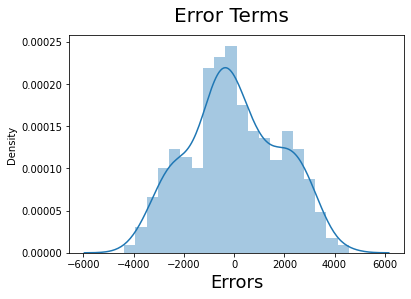

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

### ***Make Predications***

In [95]:
num_vars=X.columns.tolist()
s1_test[num_vars] = scaler.transform(s1_test[num_vars])
s1_test[num_vars] = scaler.transform(s1_test[num_vars])
y_test = s1_test.pop('price')
X_test = s1_test


ValueError: ignored

In [96]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


NameError: ignored

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

### ***Model Evaluation***

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label